# NAC3 - Aprendizado de maquina

Nesta nac vamos desenvolver um modelo preditivo do valor do carro.


Dica: Siga todas as instru√ß√µes, completando e construindo os algoritmos necess√°rios.

Nas celulas **Seu C√≥digo aqui...** significa que √© necess√°rio realizar a implementa√ß√£o de algum c√≥digo. Utilize quantos blocos julgar necess√°rio para criar o c√≥digo.

Nas celulas **Responda** significa que √© ness√°rio uma resposta clara e objetiva (pode ser por texto, gr√°fico, imagem...) para a pergunta.


## Informa√ß√µes do grupo

Este projeto poder√° ser feito por grupos de `at√© 2 alunos`.

| Nome dos Integrantes             | RM             | Turma   |
| :------------------------------- | :------------- | :-----: |
| Gabriel Siqueira Petillo         | RM 81238       |  4SIA   |
| Jean Jacques Nascimento Barros   | RM 81524       |  4SIA   |


## Data de entrega final

Ser√° considerado para avalia√ß√£o e corre√ß√£o o ultimo commit do `**dia 16/09/2021**`

Responda o `Google forms` :   [LINK FORMULARIO](https://forms.gle/2iivfbMVToXwe9Wc6).


## Rubrica 

Os crit√©rios de avalia√ß√£o do projeto ser√° conforme a rubrica.


- R1: Explora√ß√£o de Dados (At√© 1 ponto)
- R2: Prepara√ß√£o de Dados (At√© 2 ponto)
- R3: Desenvolvimento do Modelo (At√© 2 ponto)
- R4: Treinamento e Teste do Modelo (At√© 1 ponto)
- R5: Valida√ß√£o e Otimiza√ß√£o do Modelo (At√© 2 ponto)
- R6: Conclus√µes Finais (At√© 2 ponto)

Nota_final = R1 + R2 + R3 + R4 + R5 + R6

## 1. Explora√ß√£o de Dados

Os dados que ser√£o utilizados extra√≠dos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

Carregue o dataset "Automobile.csv" e fa√ßa uma inspe√ß√£o nas 15 primeiras linhas para identifica√ß√£o b√°sica dos atributos.

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [138]:
#Seu C√≥digo aqui....
url_db= 'Automobile.csv'
df = pd.read_csv(url_db, header=0)

pd.set_option('display.max_columns', 75)
df.head(15)

symboling  normalized_losses         make fuel_type aspiration  \
0           3                168  alfa-romero       gas        std   
1           3                168  alfa-romero       gas        std   
2           1                168  alfa-romero       gas        std   
3           2                164         audi       gas        std   
4           2                164         audi       gas        std   
5           2                161         audi       gas        std   
6           1                158         audi       gas        std   
7           1                168         audi       gas        std   
8           1                158         audi       gas      turbo   
9           2                192          bmw       gas        std   
10          0                192          bmw       gas        std   
11          0                188          bmw       gas        std   
12          0                188          bmw       gas        std   
13          1                149          bmw       gas        std   
14          0                149          bmw       gas        std   

   number_of_doors   body_style drive_wheels engine_location  wheel_base  \
0              two  convertible          rwd           front        88.6   
1              two  convertible          rwd           front        88.6   
2              two    hatchback          rwd           front        94.5   
3             four        sedan          fwd           front        99.8   
4             four        sedan          4wd           front        99.4   
5              two        sedan          fwd           front        99.8   
6             four        sedan          fwd           front       105.8   
7             four        wagon          fwd           front       105.8   
8             four        sedan          fwd           front       105.8   
9              two        sedan          rwd           front       101.2   
10            four        sedan          rwd           front       101.2   
11             two        sedan          rwd           front       101.2   
12            four        sedan          rwd           front       101.2   
13            four        sedan          rwd           front       103.5   
14            four        sedan          rwd           front       103.5   

    length  width  height  curb_weight engine_type number_of_cylinders  \
0    168.8   64.1    48.8         2548        dohc                four   
1    168.8   64.1    48.8         2548        dohc                four   
2    171.2   65.5    52.4         2823        ohcv                 six   
3    176.6   66.2    54.3         2337         ohc                four   
4    176.6   66.4    54.3         2824         ohc                five   
5    177.3   66.3    53.1         2507         ohc                five   
6    192.7   71.4    55.7         2844         ohc                five   
7    192.7   71.4    55.7         2954         ohc                five   
8    192.7   71.4    55.9         3086         ohc                five   
9    176.8   64.8    54.3         2395         ohc                four   
10   176.8   64.8    54.3         2395         ohc                four   
11   176.8   64.8    54.3         2710         ohc                 six   
12   176.8   64.8    54.3         2765         ohc                 six   
13   189.0   66.9    55.7         3055         ohc                 six   
14   189.0   66.9    55.7         3230         ohc                 six   

    engine_size fuel_system  bore  stroke  compression_ratio  horsepower  \
0           130        mpfi  3.47    2.68                9.0         111   
1           130        mpfi  3.47    2.68                9.0         111   
2           152        mpfi  2.68    3.47                9.0         154   
3           109        mpfi  3.19    3.40               10.0         102   
4           136        mpfi  3.19    3.40                8.0         115   
5           136        mp

**Pergunta:** Apresente uma rela√ß√£o das coluna e seu significado:

Exemplo: 

- make: fabricante
- fuel_type: tipo de combust√≠vel
- price: pre√ßo (**Vari√°vel Alvo, atributo que ser√° predito pelo modelo de ML**)

**Responda**

- **symboling**: grau de risco de seguro
- **normalized_losses**: m√©dia de deprecia√ß√£o do ve√≠culo ao ano
- **make**: marca fabricante
- **fuel_type**: tipo de combust√≠vel
- **aspiration**: forma de mistura ar-combust√≠vel
- **number_of_doors**: quantidade de portas
- **body_style**: tipo de carroceria
- **drive_wheels**: tipo de tra√ß√£o
- **engine_location**: posi√ß√£o do motor
- **wheel_base**: dist√¢ncia entre os eixos
- **length**: comprimento do ve√≠culo
- **width**: largura do ve√≠culo
- **height**: peso do ve√≠culo
- **curb_weight**: peso padr√£o do ve√≠culo (sem carga)
- **engine_type**: tipo de motor
- **number_of_cylinders**: quantidade de cilindros
- **engine_size**: tamanho do motor
- **fuel_system**: sistema de inje√ß√£o de combust√≠vel
- **bore**: di√¢metro do cilindro do motor
- **stroke**: dist√¢ncia de movimento do pist√£o em um ciclo
- **compression_ratio**: raz√£o entre o volume do cilindro e a c√¢mara de combust√£o
- **horsepower**: cavalos de pot√™ncia (HP)
- **peak_rpm** √°pice de rota√ß√µes por minuto (RPM) do motor,
- **city_mpg**: rendimento de milhas por gal√£o de combust√≠vel em ambiente urbano
- **highway_mpg**: rendimento de milhas por gal√£o de combust√≠vel em rodovias
- **price**: pre√ßo do ve√≠culo ao consumidor






### An√°lise profunda dos dados

Fa√ßa uma an√°lise explorat√≥ria dos dados. Utilize-se de gr√°ficos e tabelas auxiliares, fa√ßa correla√ß√µes entre os atributos e levante algumas suposi√ß√µes. 

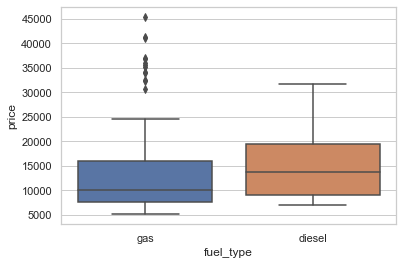

In [139]:
# Rela√ß√£o entre o tipo de combust√≠vel e o pre√ßo
sns.boxplot(x='fuel_type', y='price', data=df)
plt.show()

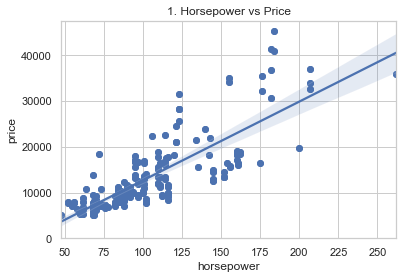

In [140]:
x = df['horsepower']
y = df['price']

plt.scatter(x, y)

sns.regplot(x='horsepower', y='price', data=df)
plt.title('1. Horsepower vs Price')
plt.ylim(0)
plt.show()

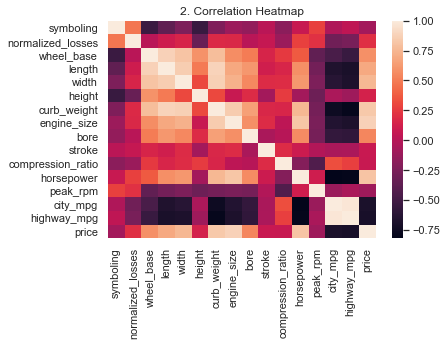

In [141]:
sns.heatmap(df.corr(), annot=False)
plt.title('2. Correlation Heatmap')
plt.show()

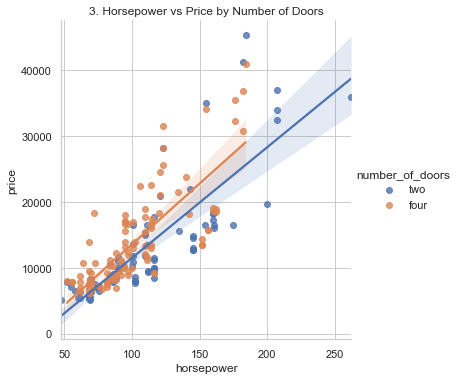

In [142]:
g = sns.lmplot(
    data=df,
    x='horsepower', y='price', hue='number_of_doors',
    height=5
)

g.set(xlabel='horsepower', ylabel='price', title='3. Horsepower vs Price by Number of Doors')

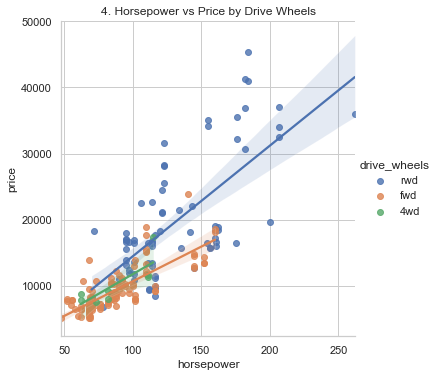

In [143]:
g = sns.lmplot(
    data=df,
    x='horsepower', y='price', hue='drive_wheels',
    height=5
)

g.set(xlabel='horsepower', ylabel='price', title='4. Horsepower vs Price by Drive Wheels')

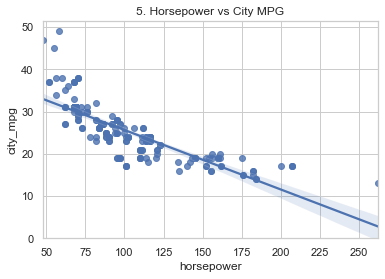

In [144]:
sns.regplot(x='horsepower', y='city_mpg', data=df)
plt.title('5. Horsepower vs City MPG')
plt.ylim(0)
plt.show()

**Pergunta:** Cite um exemplo de pelo menos os 3 cen√°rios propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

## üìùResposta

### 1. Horsepower vs Price
- O pre√ßo m√©dio dos ve√≠culos a diesel tende a ser maior que o pre√ßo m√©dio dos ve√≠culos a gasolina. Por√©m, os ve√≠culos de maior valor s√£o majoritariamente a gasolina.
### 2. Correlation Heatmap
- Existe uma forte correla√ß√£o entre o comprimento e a largura dos ve√≠culos, j√° que em geral seguem a mesma propor√ß√£o.
### 3. Horsepower vs Price by Number of Doors
- A quantidade de portas n√£o impacta diretamente no pre√ßo.
### 4. Horsepower vs Price by Drive Wheels
- Carros que tem maior pre√ßo e pot√™ncia s√£o em sua maioria de tra√ß√£o traseira
### 5. Horsepower vs City MPG
- O rendimento de um ve√≠culo em milhas por gal√£o em ambiente urbano √© inversamente proporcional a sua pot√™ncia, ou seja, um ve√≠culo mais potente tem um rendimento menor. Essa afirma√ß√£o tamb√©m se aplica no rendimento de ve√≠culos em rodovias.

## 2. Prepara√ß√£o dos Dados

### An√°lise de valores inv√°lidos

Fa√ßa a an√°lise de dados ausente, dados nulos e dados iguais a 0(zero). **Lembre-se:** Trate esses dados dentro do contexto de an√°lise e justifique suas escolhas.
 

**Resposta:**

In [145]:
# filter only object from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

In [146]:
#Seu C√≥digo aqui...
df.isnull().sum()

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

## üìùResposta
- N√£o h√° valores nulos ou ausentes em nenhum dos atributos. A coluna symboling apresenta valores "0" (zero) pois seu intervalo intervalo varia de -3 a 3, expressando o grau de risco de seguro do ve√≠culo, o que √© um dado v√°lido.

### __(BONUS: 1 ponto extra.)__ An√°lise de Outliers

Realize a an√°lise e o tratamento de **outliers**, como refer√™ncia para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

## üìùResposta

**Pergunta:** Foram localizados outliers? Qual o m√©todo de an√°lise adotado? Se existe, como os dados foram tratados (removidos ou mantidos)? 

**Resposta:**

### Tratamento de dados Param√©tricos

Fa√ßa o tratamento dos atributos n√£o num√©ricos. Descubra quais s√£o os atributos n√£o num√©ricos, fa√ßa a an√°lise dos valores desses atributos e manipule de forma conveniente para ser interpretado como um dado num√©rico. 

In [147]:
import category_encoders as ce

def clean_numeric_data(df):
    encoder = ce.OneHotEncoder(cols=["fuel_type", "aspiration", "number_of_doors", "body_style",
                                    "drive_wheels", "engine_location", "engine_type", "number_of_cylinders", "fuel_system", "make"])

    df_cleaned = encoder.fit_transform(df)

    return df_cleaned

df_cleaned = clean_numeric_data(df)
df_cleaned.head()

symboling  normalized_losses  make_1  make_2  make_3  make_4  make_5  \
0          3                168       1       0       0       0       0   
1          3                168       1       0       0       0       0   
2          1                168       1       0       0       0       0   
3          2                164       0       1       0       0       0   
4          2                164       0       1       0       0       0   

   make_6  make_7  make_8  make_9  make_10  make_11  make_12  make_13  \
0       0       0       0       0        0        0        0        0   
1       0       0       0       0        0        0        0        0   
2       0       0       0       0        0        0        0        0   
3       0       0       0       0        0        0        0        0   
4       0       0       0       0        0        0        0        0   

   make_14  make_15  make_16  make_17  make_18  make_19  make_20  make_21  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   make_22  fuel_type_1  fuel_type_2  aspiration_1  aspiration_2  \
0        0            1            0             1             0   
1        0            1            0             1             0   
2        0            1            0             1             0   
3        0            1            0             1             0   
4        0            1            0             1             0   

   number_of_doors_1  number_of_doors_2  body_style_1  body_style_2  \
0                  1                  0             1             0   
1                  1                  0             1             0   
2                  1                  0             0             1   
3                  0                  1             0             0   
4                  0                  1             0             0   

   body_style_3  body_style_4  body_style_5  drive_wheels_1  drive_wheels_2  \
0             0             0             0               1               0   
1             0             0             0               1               0   
2             0             0             0               1               0   
3             1             0             0               0               1   
4             1             0             0               0               0   

   drive_wheels_3  engine_location_1  engine_location_2  wheel_base  length  \
0               0                  1                  0        88.6   168.8   
1               0                  1                  0        88.6   168.8   
2               0                  1                  0        94.5   171.2   
3               0                  1                  0        99.8   176.6   
4               1                  1                  0        99.4   176.6   

   width  height  curb_weight  engine_type_1  engine_type_2  engine_type_3  \
0   64.1    48.8         2548              1              0              0   
1   64.1    48.8         2548              1              0              0   
2   65.5    52.4         2823              0              1              0   
3   66.2    54.3         2337              0              0              1   
4   66.4    54.3         2824              0              0              1   

   engine_type_4  engine_type_5  engine_type_6  number_of_cylinders_1  \
0              0              0              0                      1   
1              0              0              0                      1   
2              0              0              0                      0   
3              0              0              0                      1   
4              0              

In [148]:
y = df_cleaned['price']
X = df_cleaned.drop(['price'], axis=1)

In [149]:
from sklearn.preprocessing import MinMaxScaler
#Separar os dados em treino e teste
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(scaled_data, columns=df_cleaned.columns[:-1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 74), (41, 74), (160,), (41,))

In [150]:
def gaussian_nb():
    from sklearn.naive_bayes import GaussianNB

    gnb = GaussianNB()

    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    return y_pred

print(gaussian_nb())

[ 7799 20970  6529  7738 15040  5572 45400 11248 16558 32250 25552 13845
 11549  6189  8495  7995 10595  7738  8189 40960 32528 30760  7198  6849
 25552 18344  9279 25552 32528  7957 16925  5572 13645  6189  8778 16630
  5118  7775  8449  9959 14869]


In [151]:
def linear_regression():
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    y_pred = reg.predict(X_test)
    
    print('Coefficients: \n', reg.coef_)
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('R2 score: %.2f' % r2_score(y_test, y_pred))
    
    return reg

linear_regression()

Coefficients: 
 [-4.50730098e+02 -8.40199404e+02 -4.57140216e+15 -4.57140216e+15
 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15
 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15
 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15  7.15614170e+15
 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15
  2.22264459e+16 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15
 -1.26942734e+16 -3.92516087e+15 -2.70653119e+16 -2.70653119e+16
  3.55747144e+16  3.55747144e+16 -8.52739950e+15 -8.52739950e+15
 -8.52739950e+15 -8.52739950e+15 -8.52739950e+15 -9.60940309e+15
 -9.60940309e+15 -9.60940309e+15 -1.31152561e+16  1.36825919e+16
  6.92512500e+03 -7.54600000e+03  5.93000000e+03 -3.18800000e+03
  1.72460000e+04 -1.00722912e+16 -1.00722912e+16 -1.00722912e+16
 -2.17998351e+16 -5.00185640e+15 -3.68701392e+16 -4.41660677e+15
 -4.41660677e+15 -4.41660677e+15  7.31093710e+15 -4.41660677e+15
 -3.12043724e+15 -4.41660677e+15  6.76300000e+03  1.30243660e+15
  1.30243

LinearRegression()

<AxesSubplot:>

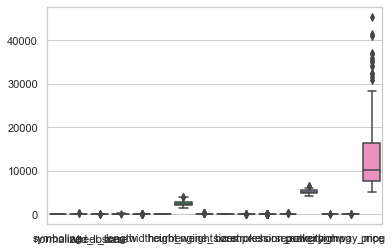

In [152]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot( data=df)

**Pergunta:** Quais s√£o os atributos n√£o num√©ricos? Qual o m√©todo de an√°lise adotado? Por que esse essa escolha? 

## üìùResposta

Utilizando o c√≥digo:

In [153]:
df_obj = df.select_dtypes(exclude=['int64', 'float64'])
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make                 201 non-null    object
 1   fuel_type            201 non-null    object
 2   aspiration           201 non-null    object
 3   number_of_doors      201 non-null    object
 4   body_style           201 non-null    object
 5   drive_wheels         201 non-null    object
 6   engine_location      201 non-null    object
 7   engine_type          201 non-null    object
 8   number_of_cylinders  201 non-null    object
 9   fuel_system          201 non-null    object
dtypes: object(10)
memory usage: 15.8+ KB


Os atributos n√£o num√©ricos s√£o:

- make
- fuel_type
- aspiration
- number_of_doors
- body_style
- drive_wheels
- engine_location
- engine_type
- number_of_cylinders
- fuel_system

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplica√ß√£o de qual modelo de aprendizagem de maquina para a determina√ß√£o do pre√ßo de carro? Por que ? 

## üìùResposta

    [ ] Aprendizado por refor√ßo
    [x] Aprendizado supervisionado
    [ ] Aprendizado n√£o supervisionado

**Pergunta:** Qual a t√©cnica sugerida para este projeto?

## üìùResposta

    [x] Regress√£o
    [ ] Classifica√ß√£o
    [ ] Clusteriza√ß√£o

**Pergunta:** Escolha 3 modelos de algoritmos para testar a performance de cada um deles.

## üìùResposta

1. Random Forest Regressor
2. Linear Regression 
3. Decision Tree Regressor {{Perguntar se esse est√° correto}}
3. {{Tirar d√∫vida com o professor}}

**Pergunta:** Explique como cada algoritmo funciona.



## üìùResposta

1. Random Forest Regressor 
-
2. Linear Regression
-
3. Decision Tree Regressor
- As √°rvores de decis√£o s√£o usadas para ajustar uma curva senoidal com observa√ß√£o adicional de ru√≠do. Como resultado, ele aprende regress√µes lineares locais que se aproximam da curva seno.

Crie um subset dos dados apenas com os atributos que ser√£o utilizados para o treinameno e teste do modelo.

In [154]:
#Seu C√≥digo aqui...
X = df_cleaned.drop(['price'], axis=1)
Y = df_cleaned['price']

Divida o subset em conjunto de treinamento e teste.

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## 4. Treinamento e teste do modelo

Fa√ßa o treinamento e teste de dos 3 algoritmos escolhidos. Para cada um dos modelos utilize uma das m√©tricas: R2-score, RMSE e MAE para avaliar a performance dos medelos. Utilize a m√©dia do obtido da valida√ß√£o cruzada para um kfold de 5.

### Algoritmo 1

In [156]:
from sklearn.ensemble import RandomForestRegressor

randomForestRegressor = RandomForestRegressor()
randomForestRegressor.fit(X_train, y_train)

predict = randomForestRegressor.predict(X_test)
print("R2-score: ", r2_score(y_test, predict))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)))
print('MAE: ', mean_absolute_error(y_test, predict))

scores = cross_val_score(randomForestRegressor, X, Y,
                         cv=crossvalidation, scoring='r2')
print("R2-score m√©dio com KFold: ", scores.mean())


R2-score:  0.8976842979990209
RMSE:  2253.538950333913
MAE:  1467.931578844653
R2-score m√©dio com KFold:  0.921159600657016


### Algoritmo 2

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=7)

linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

predict = linearRegression.predict(X_test)
print("R2-score: ", r2_score(y_test, predict))
print('MAE: ', mean_absolute_error(y_test, predict))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)))

scores = cross_val_score(linearRegression, X, y,
                         cv=crossvalidation, scoring='r2')
print("R2-score m√©dio com KFold: ", scores.mean())


R2-score:  0.8701131808376099
MAE:  2003.388581772015
RMSE:  2539.080472075106
R2-score m√©dio com KFold:  0.8794613157151125


### Algoritmo 3

In [158]:
from sklearn.ensemble import GradientBoostingRegressor

gradientBoostingRegressor = GradientBoostingRegressor()
gradientBoostingRegressor.fit(X_train, y_train)

predict = gradientBoostingRegressor.predict(X_test)
print("R2-score: ", r2_score(y_test, predict))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)))
print('MAE: ', mean_absolute_error(y_test, predict))

scores = cross_val_score(gradientBoostingRegressor, X, Y,
                         cv=crossvalidation, scoring='r2')
print("R2-score m√©dio com KFold: ", scores.mean())


R2-score:  0.8730944945522355
RMSE:  2509.771343710446
MAE:  1606.4647362289709
R2-score m√©dio com KFold:  0.9226739536313865


In [159]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

predict = ridge.predict(X_test)
print("R2-score: ", r2_score(y_test, predict))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)))
print('MAE: ', mean_absolute_error(y_test, predict))

scores = cross_val_score(ridge, X, Y,
                         cv=crossvalidation, scoring='r2')
print("R2-score m√©dio com KFold: ", scores.mean())


R2-score:  0.911444401495142
RMSE:  2096.5341260710143
MAE:  1678.188908429422
R2-score m√©dio com KFold:  0.9187794845554063


In [160]:
df_obj = df.select_dtypes(exclude=['int64', 'float64'])
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make                 201 non-null    object
 1   fuel_type            201 non-null    object
 2   aspiration           201 non-null    object
 3   number_of_doors      201 non-null    object
 4   body_style           201 non-null    object
 5   drive_wheels         201 non-null    object
 6   engine_location      201 non-null    object
 7   engine_type          201 non-null    object
 8   number_of_cylinders  201 non-null    object
 9   fuel_system          201 non-null    object
dtypes: object(10)
memory usage: 15.8+ KB


**Pergunta:** Qual foi a performance de cada algoritmo? Explique os resultados e detalhe como a caracter√≠stica de cada algoritmo influenciou no resultado.

## üìùResposta

## 5. Valida√ß√£o e Otimiza√ß√£o do Modelo

Fa√ßa a otimiza√ß√£o dos modelos, tunning dos hiperparametros, utilize t√©cinicas como **RandomSearchCV** ou **GridSearchCV**.

**Pergunta:** Qual a t√©cnica escolhida? Por que?

## üìùResposta

Segundo a documenta√ß√£o das duas t√©cnicas utilizadas, a RandomSearchCV √© uma t√©cnica de busca aleat√≥ria, que utiliza um conjunto de par√¢metros aleat√≥rios para ajustar o modelo. A GridSearchCV √© uma t√©cnica de busca em grade, que utiliza um conjunto de par√¢metros fixos para ajustar o modelo. Para o nosso caso pela quantidade de par√¢metros foi escolhido o RandomSearchCV, pois ele realiza um menor n√∫mero de itera√ß√µes, e aumenta as chances de encontrar os par√¢metros ideias para o modelo com menor uso de poder computacional.

### Algoritmo 1

In [161]:
randomForestRegressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [185]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120, 130],
    'max_features': [2, 3],
    'n_estimators': [100, 400, 5000]
}

randomSearchCv = RandomizedSearchCV(
    estimator=randomForestRegressor, param_distributions=param_grid, cv=crossvalidation, scoring='r2', n_iter=10)
randomSearchCv.fit(X, Y)

print('Melhor Par√¢metros: ', randomSearchCv.best_params_)
print('Melhor score: ', randomSearchCv.best_score_)

### Algoritmo 2

In [163]:
linearRegression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [182]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'copy_X': [True],
    'fit_intercept': [True],
    'n_jobs': [10, 20, 30],
    'positive': [True, False],
    'normalize': [True, False],
}

randomSearchCv = RandomizedSearchCV(
    estimator=linearRegression, param_distributions=param_grid, cv=crossvalidation, scoring='r2', n_iter=10)
randomSearchCv.fit(X, Y)

print('Melhores Par√¢metros: ', randomSearchCv.best_params_)
print('Melhor score: ', randomSearchCv.best_score_)

Melhores Par√¢metros:  {'positive': True, 'normalize': False, 'n_jobs': 20, 'fit_intercept': True, 'copy_X': True}
Melhor score:  0.9064481240176022


### Algoritmo 3

In [178]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [184]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'copy_X': [True],
    'fit_intercept': [True],
    'normalize': [True, False],
    'max_iter': [10, 1000, 10000]
}

randomSearchCv = RandomizedSearchCV(
    estimator=ridge, param_distributions=param_grid, cv=crossvalidation, scoring='r2', n_iter=10)
randomSearchCv.fit(X, Y)

print('Melhor Par√¢metros: ', randomSearchCv.best_params_)
print('Melhor score: ', randomSearchCv.best_score_)

C:\Users\jjean\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Melhor Par√¢metros:  {'normalize': False, 'max_iter': 10, 'fit_intercept': True, 'copy_X': True}
Melhor score:  0.9187794845554063


Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontua√ß√µes para os conjuntos de dados de treino e de testes

**Resposta:**

|                      | RandomForestRegressor |     LinearRegression  |    Ridge   |
|:---------------------|:---------------------:|:---------------------:|:----------:|
| treino |      X      |      X                |       X               |
| teste  |      X      |      X                |       X               |


**Pergunta:** Qual dos algoritmos obteve os melhores resultados? Quais caracater√≠sticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**

### __(BONUS: 1 ponto extra.)__ Implementa√ß√£o do algoritmo otimizado

Configure o modelo selecionado com os par√¢metros otimizados obtidos anteriormente.

In [ ]:
#Seu C√≥digo aqui...



### Modelo de produ√ß√£o: Teste com novos dados

Utilize 3 exemplos criados por voc√™ mesmo para obter um valor de venda de ve√≠culo. Defina o teste para um resultado baixo, m√©dio e alto do pre√ßo do carro.

In [ ]:
#Seu C√≥digo aqui...



**Pergunta:** Qual foi o resultado obtido? O resultado est√° coerente com o esperado?

**Resposta:**

## 6. Conclus√µes finais

Ufa!!... Chegamos ao final deste projeto. Parab√©ns! De forma simplificada e completa passamos por todas as etapas de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.

**Pergunta:**: O modelo desenvolvido obteve um resultado satisfat√≥rio? Justifique:

## üìùResposta

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**:

**Pergunta:**: As etapas de desenvolvimento se aplicam para um problema de classifica√ß√£o? Justifique:

**Resposta**:

## Refer√™ncias

- [https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html)
- [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)